## Lab 11 (April 11):
### The Map Family and Simple Linear Models 

Course page: https://ambujtewari.github.io/stats306-winter2022/

Lab page: https://bosafoagyare.netlify.app/courses/stats306-w22/
 <br> <br>
  Today, we are going to look at:   
 - [The Map Family]()
 - [Simple Linear Models]()

 

_[Lab materials and figures were adapted from: https://adv-r.hadley.nz/functionals.html]_ 




<br><br>
> ## Let's start by loading our packages. It is always encouraged to load all packages atop your codes.

In [ ]:
library(tidyverse)       
library(modelr) # wrapper around base R modeling functions so that they work with the pipe
options(repr.plot.width=10, repr.plot.height=8)    ## Set the dimension of all plots 


---

<br> <br>


## **1. Introduction**
Over the past two labs, we have learned how to use functions and iterations to simplify repetitive tasks. 

Recall how we used functions and iterations to tranform  all columns of our tibble. i.e. $
x_{scaled} = \dfrac{x - x_{min}}{x_{max} - x_{min}}
$

In [ ]:
## Dataset
df <- tibble(
  a = rnorm(10, 3, 3),
  b = rnorm(10, 8, 2),
  c = rnorm(10, 50, 10),
  d = rnorm(10, 75, 25)
)

## Make copies if raw tibble for future use
df3 <- df2 <-df1 <- df

## min-max scaler function
min_max_scaler <- function(x) {
  rng <- range(x, na.rm = TRUE)
  (x - rng[1]) / (rng[2] - rng[1])
}


## (1) apply to all columns
df$a <- min_max_scaler(x = df$a)
df$b <- min_max_scaler(x = df$b)
df$c <- min_max_scaler(x = df$c)
df$d <- min_max_scaler(x = df$d)


## (2) use iterations
for (i in seq_along(df1)) {
   df1[i] <- min_max_scaler(df[i])
}
## call
df1

Now, we want to learn an even more efficient way of performing iterations. We introde the `map_()` family. Let's use the `modify` function from the `map_` family to replicate the task above instead of a `for` loop: 

In [8]:
## (1) Using map_df
df2 <- map_df(df2, min_max_scaler)
df2


In [ ]:
## (2) Using modify
df3 <- modify(df3, min_max_scaler)
df3

<br><br>
## **2. The Map Family**
The `map` functions are **functionals** (_a function that takes a function as an input and returns a vector as output_). They take **lists** or **atomic vectors** and a **function** as arguments. A visualization of how they work is below:

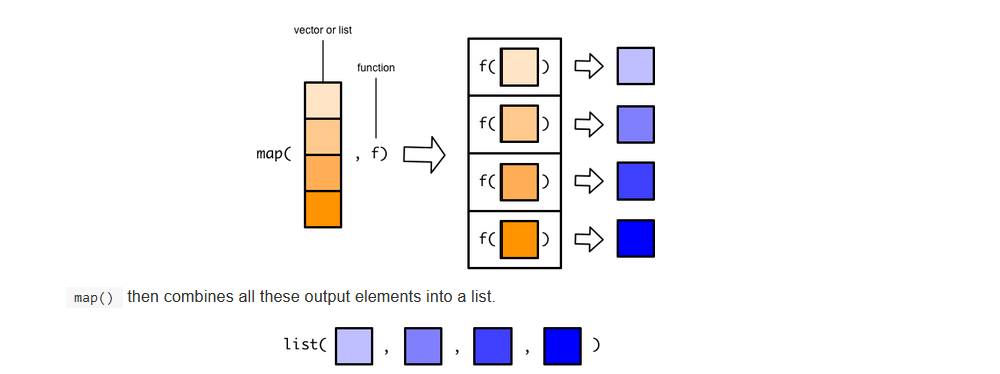





<br>   
Consider the list below. We wish to take the length of every element of the parent list: 

```{r}
moons <-
  list(
    earth = 1737.1,
    mars = c(11.3, 6.2),
    neptune = 
      c(60.4, 81.4, 156, 174.8, 194, 34.8, 420, 2705.2, 340, 62, 44, 42, 40, 60)
  )
```

Using `map` this is evaluated as:

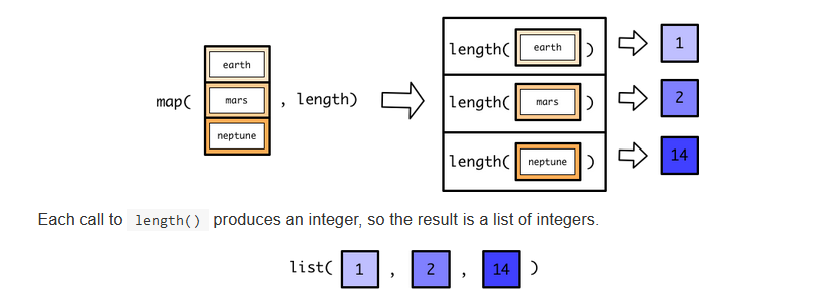

In [ ]:
## Planets

moons <-
  list(
    earth = 1737.1,
    mars = c(11.3, 6.2),
    neptune = 
      c(60.4, 81.4, 156, 174.8, 194, 34.8, 420, 2705.2, 340, 62, 44, 42, 40, 60)
  )

map(moons, length)

### **2.1 Variants of Map**
From the example above, we see that a list is returned as the output. This is the default behavior of `map`. However, we may want atomic vectors (_intergers, doubles, characters, logical_) to be the outputs for specific tasks. Below gives variations of the `map` functional together with descriptions:


- `map_int()` creates an integer vector.
- `map_dbl()` creates a double vector.
- `map_chr()` creates a character vector.
- `map_lgl()` creates a logical vector.



In [ ]:
## Example (1)
map_dbl(moons, median)

<br>   
**Challenge 1**: What `map_` variant would you use to complete the following tasks? Implement the codes.

1. Find the data type for each column of `mtcars`
2. Verify which columns of `mtcars` are numeric.
3. Compute the mean of all columns in `mtcars`
4. Find the length of unique values in all columns of `mtcars`.

In [6]:
## Your code here

<br>   
### **2.2 Anonymous functions and shortcuts**

#### **2.2.1 Anonymous functions**   

As you may have observed from question 4, we can parse user-defined functions to map if they don't exist. 

In our `moon` data, the distance is measure in kilometers. Let us try to convert this from kilometers to miles by writing our own function:


In [ ]:
## Kilometers to miles
km_to_miles <- function(x) {
  x * 0.62
}

map(moons, km_to_miles)

We do not need to name this function if we don't intend using it again. Thus, we can parse the function on-the-fly when writing our `map` code. A function without a name is called an **anonymous function**.

In [ ]:
## Using anonymous function
map(moons, function(x) x * 0.62)

<br>   
#### **2.2.2 Shortcuts**  
Even better, the `purrr` package, a subpackage from `tidyverse` from which the map family is sourced makes parsing anonymous functions to `map` easier and neater. Consider the code below that performs the same task as in the example above:



In [ ]:
## Using shortcuts
map(moons, ~ . * 0.62)

The `~` tells `map()` that an anonymous function is coming. The `.` acts as placeholder for iterating each element from the data which the function is going to be applied to. The visual below demontrates what is happening

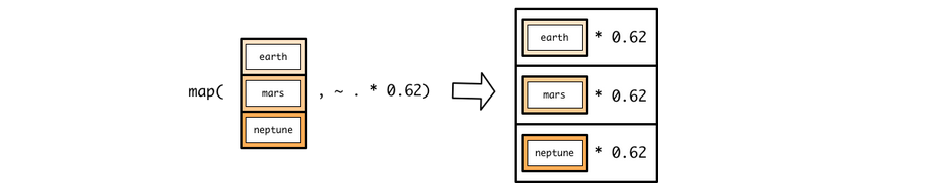

### **2.3 Extra functional arguments**
Some functions accept extra arguements like `mean()` which has the extra argument `na.rm = TRUE` if you want to escape missing values. Let's look at an exmaple below. Before that, see how the visualization below explains this idea:
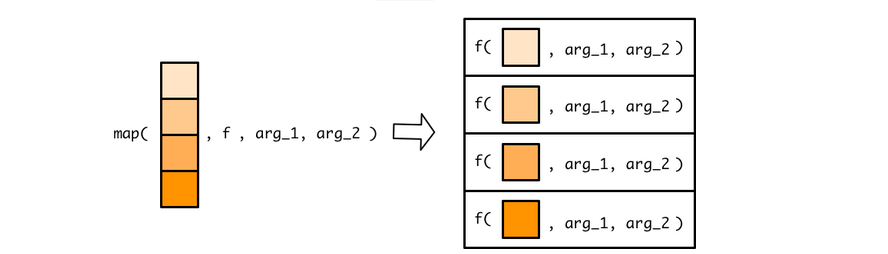

In [ ]:
## Find the 95% percentile of df
map_dbl(df, quantile, probs = 0.95, na.rm = TRUE)


<br>   
**Challenge 2**: Now use anonymous functions to answer Q4 from challenge 1

4. Find the length of unique values in all columns of `mtcars`.

<br>   
### **2.4 Map with multiple inputs/vectors**

We have learned so far how to use `map_` to iterate over a single vector. However, there is so much power with the `purrr` package such as parsing several vectors as arguments for a function to be applied in parallel (row-wise) to the elements of the dataset. We will first look at `map2()` for two inputs and then `pmap` (_parallel map_) for multiple inputs. Note that since this works in parallel, the input lengths of the vectors must be equal.


#### **2.4.1 map2 (for two inputs)**
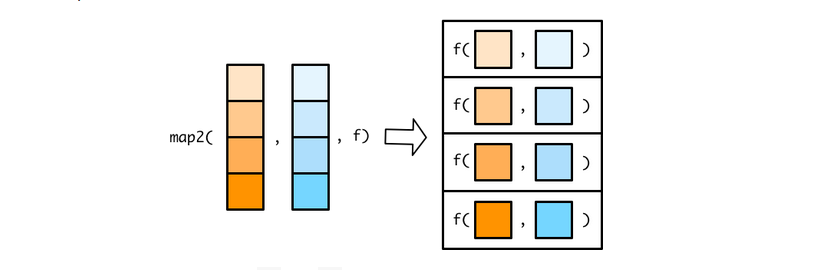

In [ ]:
## Find the row-wise minimum
x <- c(1, 2, 4)
y <- c(6, 5, 3)

map2_dbl(x, y, min)

Recall how the formula for calculating weighted mean:

$$
W = \dfrac{\sum_{i=1}^nw_iX_i}{\sum_{i=1}^nw_i}$$
 where:  
 $W$= 	weighted average   
 $n$	= 	number of terms to be averaged   
 $w_{i}$	= 	weights applied to x values and   
 $X_{i}$	= 	data values to be averaged

 Assume vector **A** contains the data values and **B** the weights. We can use `map2` to compute the weighted mean as shown in the example below: 

In [ ]:
## Data and weights
data    <- map(1:8, ~ runif(10))
weights <- map(1:8, ~ rpois(10, 5) + 1)

## compute weighted mean using the weighted.mean function
map2_dbl(data, weights, weighted.mean, na.rm = TRUE)

**NOTE:**    
Inside anonymous functions in the `map()` functions, you refer to each element of the input vector as `.` . In the map2() functions, you refer to elements of the first vector as `.x` and elements of the second as `.y` 

In [ ]:
## how would you divide x vector by y using map2?

#### **2.4.2 pmap (for multiple inputs)**
Just as we have `map2` for two inputs, `pmap` (_parallel map_) take two or more inputs parsed as a list. That is, in `pmap()` functions, you specify a single list that contains all the vectors (or lists) that you want to supply to your function. Let us look at the  visual below for a demonstration of how this works:

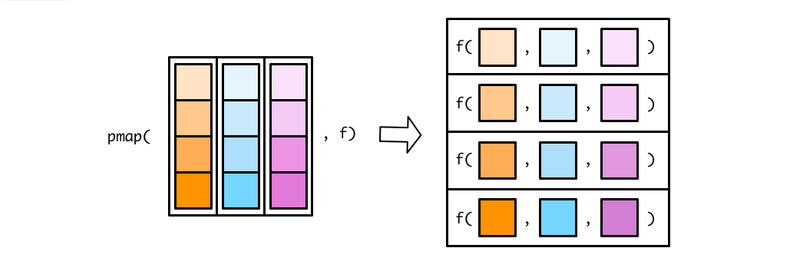

In [ ]:
## Example

x <- c(1, 2, 4)
y <- c(6, 5, 3)
z <- c(100, 15, 1)

pmap_dbl(list(x, y, z), min)

In [ ]:
## Alternatively, Tibbles are lists, so we could also combine x, y, and z into a tibble
tibble(
  a = c(50, 60, 70),
  b = c(10, 90, 40),
  c = c(1, 105, 2000)
) %>% 
  pmap_dbl(min)

**NOTE:**   
`pmap()` can involve any number of input vectors, so we need a new way of referring to each vector in an anonymous function. Instead of using `.`, `.x`, or `.y`, use `..1.`, `..2`, `..3`, etc. to refer to the different vectors.

In [ ]:
x <- c(1, 2, 4)
y <- c(6, 5, 3)
z <- c(100, 15, 1)

pmap_dbl(list(x, y, z), ~..1 + ..2 +..3)

<br>     
### **2.5 Other Variants**
Finally, let us look at examples of common variants of functionals:

**(1) `map_df` outputs tibbles. This can be useful in tranforming columns of a dataset**

In [ ]:
## Example
df2 <- map_df(df2, min_max_scaler)
df2


**(2) `keep` can be used in subseting columns of a dataset**

In [ ]:
## Keep only numeric columns
mpg_numeric <- mpg %>%
                keep(is.numeric)
head(mpg_numeric)

**(3) Similarly, `discard` can be used to discard some columns**

In [ ]:
## Discard all non-character columns 
mpg_char <- mpg %>%
               discard(~ is.character(.) == FALSE) ## or ~ !is.character(.)
head(mpg_char)               

<br><br>   
## 2. Simple Linear Models
Consider our simple linear model from Lab 9:

$$y_i = \alpha + \beta x_i + \epsilon_i$$
for a dataset $\{(x_i, y_i)_{i \in [n]}\}$.   
The OLS estimates for the intercept ($\alpha$) and the slope ($\beta$) are given by:  

$$
\hat{\alpha} = \bar{y} - (\hat{\beta} \cdot \bar{x}); \quad \quad \hat{\beta} =   \dfrac{\sum_{i = 1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i = 1}^{n}(x_i - \bar{x})^2}
$$

where $$\bar{x} = \sum_{i = 1}^{n}\dfrac{x_i}{n}; \quad \quad \bar{y} = \sum_{i = 1}^{n}\dfrac{y_i}{n}$$


**Question:** 
- Write your own (a single) function that returns both $\hat{\alpha}$ and $\hat{\beta}$.
- Write yor own response prediction function for a new dataset. This function should have an argument for the returned parameters from the previous problem.
- Write a fucntion that computes the prediction error. This function should have arguments that allow the user to select the error (loss) fuunctionof their choice as: 
    + Root Mean Square Error RMSE: 
       $$
       RMSE = \sqrt{\dfrac{\sum_{i}^{n}(\hat{y} - y)^2}{\tilde{n}}}
       $$
    + Mean Absolute Error (MAE)
       $$
       MAE = \sqrt{\dfrac{\sum_{i}^{n}|\hat{y} - y|}{\tilde{n}}}
       $$

       where $\hat{y}$ is the predicted value, $y$ is the actual value, $\tilde{n}$ is the sample size of the new dataset.

- Use this function to fit a linear model to predict the `price` of diamonds using `carat` from the `diamonds` data available in R. Report the model parameters ($\hat{\alpha}, \hat{\beta}$)
- Predict the price for the new dataset given below and reporting both the `RMSE` and `MAE` of the prediction.


    new_df <- tribble(
               ~carat, ~ price
               0.73, 2895,
               0.34, 425,
               0.95, 2960,
               0.66, 2632
    )


In [ ]:
## Your code here
 